# Tutorial on Uploading and Downloading Arrays Instead of EO Patches

We will see how to do the following things:

1. How to split an EO Patch into smaller fragments
2. Save the smaller images into our local memory
3. Retrieve those images from our local memort

In [57]:
from eolearn.core import EOPatch
import numpy as np
from math import floor
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

## Split an EO Patch into smaller fragments

In [58]:
# Write the deired AOI (area of interest)
aoi = "slovenia"

# Retrieve all the folders of our AOI
files = os.listdir('../../raw_data/eopatch/')
files = [file for file in files if f"{aoi}_eopatch" in file]

# How many EO Pathces are we retrieving
print(len(files))

36


In [59]:
def split_eopatch(patch, img_height=256, img_width=256):
    '''
    This function splits and EOPatch image into smaller 
    images of costume height and width. 
    It returns an ndarrays for x_train and y_train
    '''
    # Initialize empty lists to store results
    x_train_raw = []
    y_train_raw = []
    
    # Apply masks to picutre
    mp = patch.data_timeless['MEDIAN_PIXEL']
    tc = patch.mask_timeless['TREE_COVER']
    
    # Set patch height and width
    patch_height = mp.shape[0]
    patch_width = mp.shape[1]
    
    # Define into how many rows and columns the image will be divided into 
    mini_patch_rows = floor(patch_height/img_height)
    mini_patch_columns = floor(patch_width/img_width)

    # Split EOPatches and append to list
    for i in range(mini_patch_rows):
        for j in range(mini_patch_columns):
            x = mp[ i*img_height:(i*img_height)+img_height , j*img_width:(j*img_width)+img_width, :]
            y = tc[ i*img_height:(i*img_height)+img_height , j*img_width:(j*img_width)+img_width, :]
            if i == 0:
                pass
            elif i == (mini_patch_rows - 1):
                pass 
            else:
                x_train_raw.append(x)
                y_train_raw.append(y)

    # Convert list to np array
    x_train_raw = np.array(x_train_raw)
    y_train_raw = np.array(y_train_raw)
    
    # Returns ndarrays
    return x_train_raw, y_train_raw

### Convert EO Patches to ndarray

In [60]:
# Iterate over aoi eopatches, split them and add them into one big array
for index, file in enumerate(files):
    patch = EOPatch.load(f'../../raw_data/eopatch/{file}')
    x, y = split_eopatch(patch)
    
    if index == 0:
        x_train_raw = x
        y_train_raw = y
    else: 
        x_train_raw = np.concatenate((x_train_raw, x))
        y_train_raw = np.concatenate((y_train_raw, y))

    print(f'{x_train_raw.shape[0]} images' )
        
x_train_raw.shape, y_train_raw.shape

42 images
84 images
126 images
168 images
210 images
252 images
294 images
336 images
378 images
420 images
462 images
504 images
546 images
588 images
630 images
672 images
714 images
756 images
798 images
840 images
882 images
924 images
966 images
1008 images
1050 images
1092 images
1134 images
1176 images
1218 images
1260 images
1302 images
1344 images
1386 images
1428 images
1470 images
1512 images


((1512, 256, 256, 3), (1512, 256, 256, 1))

## Upload ndarray with all images to an AOI folder

- A folder of the aoi will be created under raw_data/raw_images/{aoi} if it doesn´t exist
- Under each aoi folder new subfolder will be created named based on their index numbers
- Inside each index number subfolder the ndarray will be saved as a .npy file

In [63]:
def upload_training_data(x_train, y_train, aoi):
    '''
    This takes an x_train y_train ndarrays and an AOI as a string.
    It will save the x_train and y_train inside a folder called under the AOI.
    '''
    # Create folder for AOI
    if not os.path.isdir(f"../../raw_data/raw_images/{aoi}"):
        os.makedirs(f"../../raw_data/raw_images/{aoi}")
        

    # Create subfolders and save images inside each as x_train_raw_{id}.jpg and y_train_raw_{id}
    for idx, (x, y) in enumerate(zip(x_train, y_train)):
        path = f"../../raw_data/raw_images/{aoi}/{idx}"

        # Make new subfolder
        os.makedirs(path)

        # Saving x_train and y_train inside subfolder
        np.save(path + f"/x_train_{idx}", x)
        np.save(path + f"/y_train_{idx}", y)

    print("Saved images")

In [62]:
upload_training_data(x_train_raw, y_train_raw, aoi)

Saved images


## Retrieve the saved data from storage

In [65]:
def download_training_data(aoi):
    '''
    This function reads through all of the content inside your AOI folder
    and returns an ndarray for x_train and an ndarray for y_train
    '''
    # Read all subfolders inside aoi folder
    path = f"../../raw_data/raw_images/{aoi}"
    files = os.listdir(path)

    # Convert to strs to int and sort by ascending order
    files = list(map(int, files))
    files.sort()


    # Initialize lists
    x_train = []
    y_train = []

    # Iterate over each of the subfolders inside
    for file in files:

        # Load x_train_{id}.npy and y_train_id.npy
        x = np.load(path + f"/{file}/x_train_{file}.npy")
        y = np.load(path + f"/{file}/y_train_{file}.npy")

        # Append to an ndarray 
        x_train.append(x)
        y_train.append(y)


    # Return as x_train and y_train
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    
    return x_train, y_train

In [67]:
# Assign download function to x_train and y_train 
x_train, y_train = download_training_data(aoi)

# The shape should be the same as wehn we convert EO Patches to ndarray
x_train.shape, y_train.shape

((1512, 256, 256, 3), (1512, 256, 256, 1))

### Plot any pair of images to verify we downloaded correctly

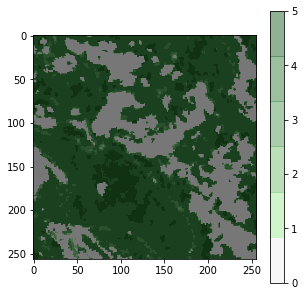

In [69]:
# Select index of pair of images
id = 900

# Define color map for y_train
tree_cmap = mpl.colors.ListedColormap(['#F0F0F0', 
                                       '#A2EB9B', 
                                       '#77C277', 
                                       '#539F5B', 
                                       '#388141', 
                                       '#226528'])


# Plot x_train and y_train together
plt.figure(figsize=(5,5))
plt.imshow(2.5*x_train[id])
plt.imshow(y_train[id], vmin=0, vmax=5, alpha=.5, cmap=tree_cmap)
plt.colorbar()